# Tarea 1

Jhon Wilmer Pino Román  
1017269052  
Curso: Ecuaciones Diferenciales II  
Profesor: Carlos Piedrahita  
Computación Científica - Facultad de Ciencias Básicas  
Universidad de Medellín - 2022-2

#2.2
We denote the error between the finite element solution and the true solution by
$E(x) = U(x) − u(x)$. The $L^2$ norm of the error of the finite element solution, $||E||_{L^2}$ , is defined to be

$$||E||_{L^2} = \sqrt{\int_{0}^{1}  \! (U(x) - u(x))^2 \, dx}$$

Which may be written as the sum of the contribution from individual elements

$$||E||_{L^2} = \sqrt{\sum_{k=1}^{N}  \int_{x_k}^{x_{k+1}} \! (U(x) - u(x))^2 \, dx}$$

(a) In sect 2.11, we saw that, for $x_k < x < x_{k+1}$, the finite element solution is given by

$$U(x) = \frac{x_{k+1} - x}{h} U_k + \frac{x-x_k}{h} U_{k+1}$$

Use this expression for U(x) to explain why, for the model problem used in this chapter, we may write

$$||E||^{2}_{L^2} = \sum_{k=1}^{N}  \int_{x_k}^{x_{k+1}} \! \left( \frac{x_{k+1} - x}{h} U_k + \frac{x-x_k}{h} U_{k+1} - x(1-x)\right)^2 \, dx$$

(b) Evaluate, by direct integration, the quantity

$$\int_{x_k}^{x_{k+1}} \! \left( \frac{x_{k+1} - x}{h} U_k + \frac{x-x_k}{h} U_{k+1} - x(1-x)\right)^2 \, dx$$


(c) Using your answers to parts (a) and (b), modify the Matlab script given in
Listing 2.1 so that it outputs the value of $||E||_{L^2}$ for a given number of elements,N.  

(d) Define the element length by $h = 1/
N$ where N is the number of elements. You
may assume that, as $h → 0, ||E||_{L^2} $ is related to the element length $h$ by
$$||E||_{L^2} = Ch^p$$

for some constants $C$ and $p$. Taking the logarithm of both sides of this expression
gives
$$log (||E||_{L^2}) = log C + p log h$$,
and so plotting $log (||E||_{L^2})$ against $log( h)$ will give a straight line of gradient $p$ as $h → 0$. By plotting $log (||E||_{L^2})$ against $log (h)$ for several values of $h$, estimate
the constant $p$


#2.3

In sect 2.11, we saw that, for $x_k < x < x_{k+1}$, the finite element solution is given by

$$U(x) = \frac{x_{k+1} - x}{h} U_k + \frac{x-x_k}{h} U_{k+1}$$

(a) Write down the derivative of the finite element solution, $\frac{dU}{
dx}$ , on element k.

(b)  Modify the Matlab script given in Listing 2.1 so that it plots the derivative of
the solution. Note that this derivative is a function that may be discontinuous
across element boundaries

#Solutions

#2.2


###(a)
 We have the $L_2$ norm given by

$$||E||_{L^2} = \sqrt{\sum_{k=1}^{N}  \int_{x_k}^{x_{k+1}} \! (U(x) - u(x))^2 \, dx} \tag1$$

And we have the solution given by FEM and the true solution of the equation as

$$U(x) = \frac{x_{k+1} - x}{h} U_k + \frac{x-x_k}{h} U_{k+1} \tag2$$

$$u(x) = x(1-x) \tag3$$$

So now we replace (2) and (3) in (1)

$$||E||_{L^2} =\sqrt{ \sum_{k=1}^{N}  \int_{x_k}^{x_{k+1}} \! \left( \frac{x_{k+1} - x}{h} U_k + \frac{x-x_k}{h} U_{k+1} - x(1-x)\right)^2 \, dx}$$

Now we get both sides to the second power

$$(||E||_{L^2})^2 =\left( \sqrt{ \sum_{k=1}^{N}  \int_{x_k}^{x_{k+1}} \! \left( \frac{x_{k+1} - x}{h} U_k + \frac{x-x_k}{h} U_{k+1} - x(1-x)\right)^2 \, dx}\right )^2$$

With that, we can cancel the square root, and that leaves us with:

$$||E||^{2}_{L^2} = \sum_{k=1}^{N}  \int_{x_k}^{x_{k+1}} \! \left( \frac{x_{k+1} - x}{h} U_k + \frac{x-x_k}{h} U_{k+1} - x(1-x)\right)^2 \, dx$$

### (b)

$$\int_{x_k}^{x_{k+1}} \! \left( \frac{x_{k+1} - x}{h} U_k + \frac{x-x_k}{h} U_{k+1} - x(1-x)\right)^2 \, dx$$


The expresion to integrate:




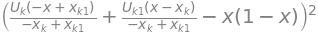

In [ ]:
from sympy import *

init_printing()

x, x_k1, x_k, U_k1, U_k, h = symbols('x x_k1 x_k U_k1 U_k h')


expr = (((x_k1 - x)/(x_k1 - x_k))*U_k + ((x - x_k)/(x_k1 - x_k))*U_k1 - x*(1-x))**2
print('The expresion to integrate:')
print('\n')
expr

In [ ]:
ex1 = factor(simplify(integrate(expr, (x, x_k, x_k1))))

In [ ]:
f2 = lambdify((x_k1, x_k, U_k1, U_k), ex1, 'numpy')

In [ ]:
f2(1,2,3,4)

### (c)



In [ ]:
import numpy as np

f2 = lambdify((x_k1, x_k, U_k1, U_k), ex1, 'numpy')

def error(N1):
  x1 = np.linspace(0.0, 1.0, N1+1)
  U = Ab_global(N1)
  xlist=x1; Ulist=U; f=f2

  EL2=0; k=0
  while k < N:
    EL2 += f(xlist[k+1], xlist[k], Ulist[k+1], Ulist[k])
    k+=1
  return np.sqrt(EL2)



In [ ]:
error(100)

In [ ]:
error(200)

In [ ]:
error(150)

### (d)



In [ ]:
def Ab_global(N):
  AG = np.zeros((N+1, N+1))
  b = np.zeros((N+1))
  i=0

  while i < N:
    Al, bl = Ab_local(h = 1/N)
    AG[i:i+2, i:i+2] = AG[i:i+2, i:i+2] + Al
    b[i:i+2] = b[i:i+2] + bl
    i+=1

  AG[0,0] = 1; AG[0,1:] = 0
  AG[N,0:] = 0; AG[N,N] = 1
  b[0] = 0; b[N] = 0

  return np.linalg.solve(AG, b)

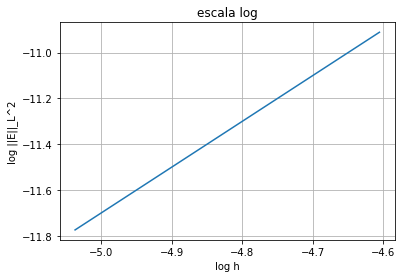

In [ ]:
N2 = list(range(100, 155))  # distintos valores de N, por lo tanto, distintos valores de h
logE = []; logh = []

for N in N2:
  x1 = np.linspace(0.0, 1.0, N+1)
  U = Ab_global(N)
  logE.append( np.log(error(N)) )
  logh.append( np.log(1/N) )

plt.plot(logh, logE); plt.xlabel('log h'); plt.ylabel('log ||E||_L^2'); plt.title('escala log')
plt.grid(); plt.show()

In [ ]:
p = (logE[1] - logE[0])/(logh[1] - logh[0])
print(p)

2.0000000811935896


# 2.3

(a) derivative of the finite element solution, $\frac{dU}{
dx}$ , on element k.

In [ ]:
import sympy as sp

Uk, Uk1, xk,xk1, h, x = sp.symbols('Uk Uk1 xk xk1 h x')

Ux = ((xk1 - x)*Uk/h) + ((x - xk)*Uk1/ h)

print("dU/dx: \n")
Ux.diff(x,1)

dU/dx: 



(b)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import lagrange

In [ ]:
def Ab_local_test(h=0):
  return np.random.randint(0, 9, (2, 2)), np.random.randint(0,9, (2))

def Ab_local(h=0.2):
  return (1/h)*np.array([[1,-1], [-1,1]]), h*np.array((1, 1))

In [ ]:
#Traduccion del codigo de matlab de whiteley
def Ab_global(N):
  AG = np.zeros((N+1, N+1))
  b = np.zeros((N+1))
  i=0

  while i < N:
    Al, bl = Ab_local(h = 1/N)
    AG[i:i+2, i:i+2] = AG[i:i+2, i:i+2] + Al
    b[i:i+2] = b[i:i+2] + bl
    i+=1

  AG[0,0] = 1; AG[0,1:] = 0
  AG[N,0:] = 0; AG[N,N] = 1
  b[0] = 0; b[N] = 0

  return np.linalg.solve(AG, b)

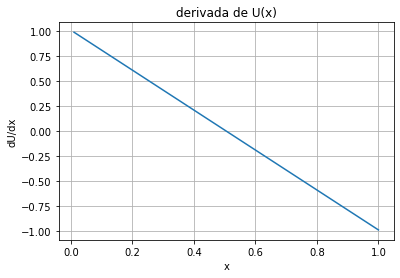

In [ ]:
N = 100
x2 = np.linspace(0.0, 1.0, N+1)
U = Ab_global(N); dU=[]

for k in range(0, N):
  dU.append((U[k+1] - U[k])/(1/N))

plt.plot(x2[1:], dU); plt.xlabel('x'); plt.ylabel('dU/dx'); plt.title('derivada de U(x)')
plt.grid(); plt.show()